## DBSCAN Algorithm 
Density-Based Spatial Clustering of Applications with Noise

- Dimensionality Reduction method: PCA.
- Hyperparameters: EPS (determined using K distance graph), MinSamples. 

In [1]:
# libraries
import pandas as pd
import numpy as np
import sys

# modelling - dbscan
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score

# dimensionality reduction 
from sklearn.decomposition import PCA

# visulaization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook

# Calling functions 
sys.path.insert(0, '../src/utils/')
import dbscan
import EDA

### Reading Data

In [2]:
# Reading data 
minmax_data = pd.read_csv('../data/processed/data_scaled_minmax.csv')

# Print the shape of data
minmax_data.shape

(3346, 231)

In [3]:
# Reading data 
standard_data = pd.read_csv('../data/processed/data_scaled_standard.csv')

# Print the shape of data
standard_data.shape

(3346, 231)

### DBSCAN on 231 dimensions and MinMax-Scaled data

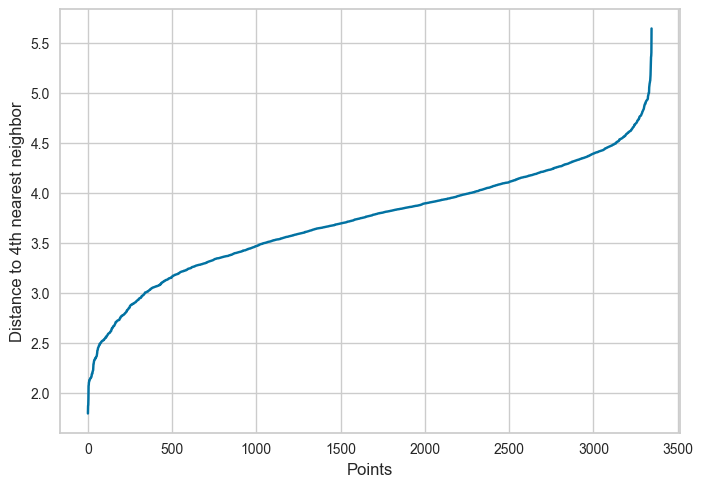

In [4]:
# Use K distance graph to determine the eps value. 
dbscan.get_kdistances(minmax_data, 4)

Based on the graph, I will choose eps = 4 <br>
I will try these values for MinSamples = [from 5 to 20]. 

In [5]:
for i in range(5,20):
    # Perform dbscan algo
    clusters = dbscan.perform_dbscan(minmax_data, 4 , i)
    # Print the number of clusters
    print("Number of Clusters = ",len(set(clusters)))

Number of Clusters =  2
Number of Clusters =  2
Number of Clusters =  2
Number of Clusters =  2
Number of Clusters =  2
Number of Clusters =  2
Number of Clusters =  2
Number of Clusters =  2
Number of Clusters =  2
Number of Clusters =  2
Number of Clusters =  2
Number of Clusters =  2
Number of Clusters =  2
Number of Clusters =  2
Number of Clusters =  2


as long as we have the same number of clusters, i'll choose 10 as the value for minsamples. 

In [6]:
# Perform dbscan algo
clusters = dbscan.perform_dbscan(minmax_data, 4 , 10)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)))

Number of Clusters =  2


In [7]:
# Create a PCA On 2 components. 
X_2reduced = dbscan.create_pca(minmax_data, 2)

Explained variance ratio for each component: [0.12570507 0.06839946]


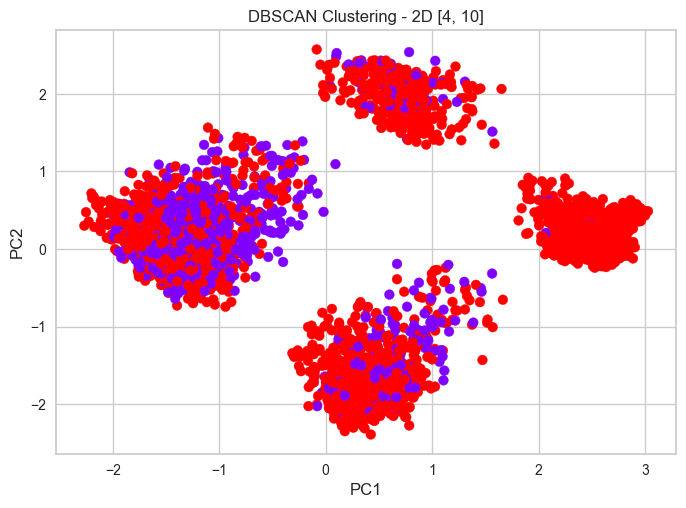

In [8]:
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D [4, 10]')

In [9]:
silhouette_vals = silhouette_samples(X_2reduced, clusters)
silhouette_avg = silhouette_score(X_2reduced, clusters)
print("silhouette avg score:",silhouette_avg)

silhouette avg score: -0.009364982448658705


In [10]:
# Create a PCA On 3 components. 
X_3reduced = dbscan.create_pca(minmax_data, 3)

Explained variance ratio for each component: [0.12570507 0.06839946 0.0525458 ]


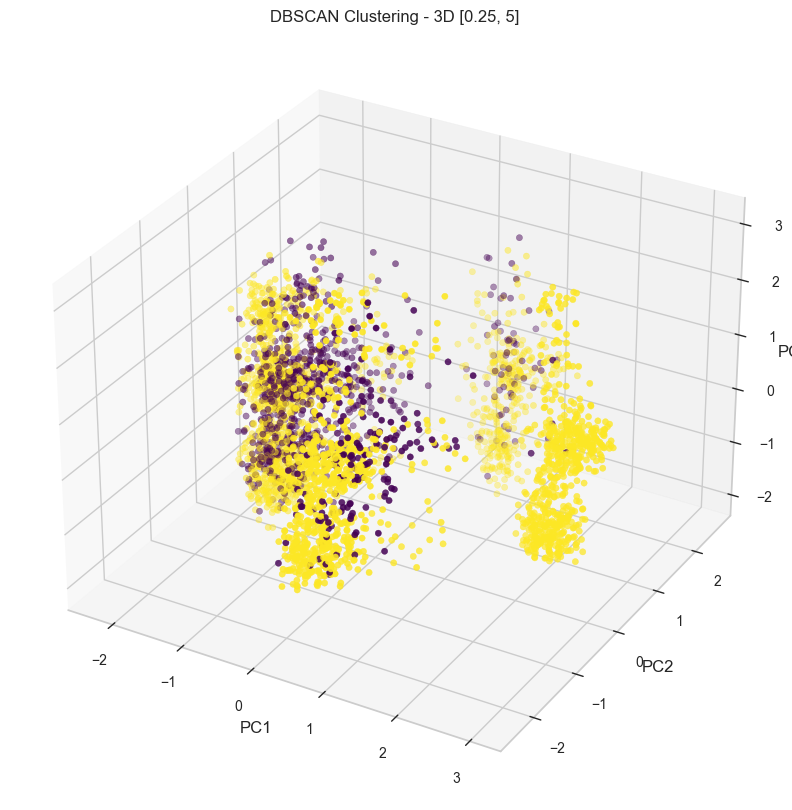

In [11]:
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D [0.25, 5]", labels=clusters)

In [12]:
silhouette_vals = silhouette_samples(X_3reduced, clusters)
silhouette_avg = silhouette_score(X_3reduced, clusters)
print("silhouette avg score:",silhouette_avg)

silhouette avg score: -0.005177795693034827


It didn't cluster the values well; because the values are close to -1


### DBSCAN on 231 dimensions and Standard-Scaled data

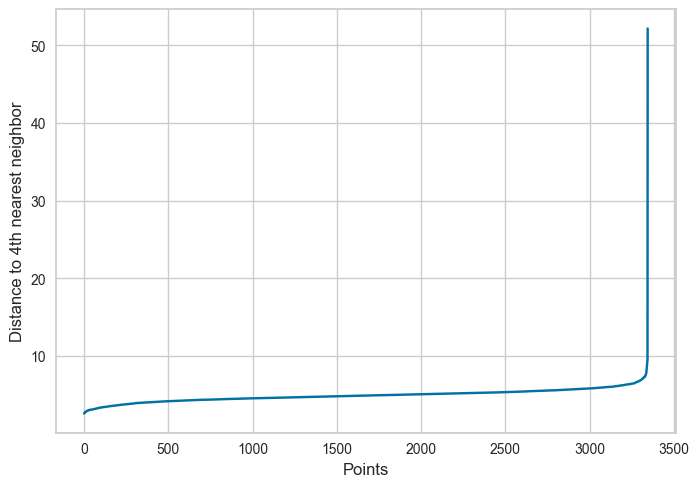

In [13]:
# Use K distance graph to determine the eps value. 
dbscan.get_kdistances(standard_data, 4)

Based on the graph, I will choose eps = 5 <br>
I will try these values for MinSamples = [from 5 to 20]. 

In [14]:
for i in range(5,20):
    # Perform dbscan algo
    clusters = dbscan.perform_dbscan(standard_data, 5 , i)
    # Print the number of clusters
    print("Number of Clusters = ",len(set(clusters)))

Number of Clusters =  8
Number of Clusters =  6
Number of Clusters =  6
Number of Clusters =  6
Number of Clusters =  6
Number of Clusters =  5
Number of Clusters =  5
Number of Clusters =  5
Number of Clusters =  4
Number of Clusters =  4
Number of Clusters =  3
Number of Clusters =  3
Number of Clusters =  3
Number of Clusters =  3
Number of Clusters =  3


as long as we have different number of clusters, i'll try these values for minsamples [5,9,10,14,20]

Number of Clusters =  8
Explained variance ratio for each component: [0.13291958 0.07575221]


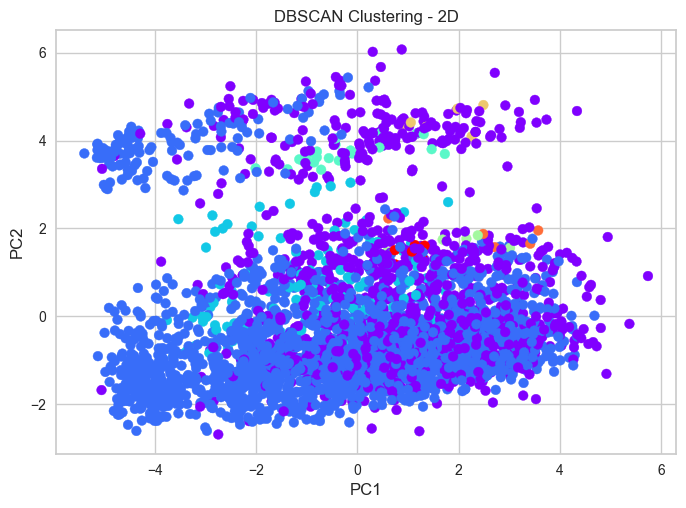

silhouette avg score: -0.25792767115392223
Explained variance ratio for each component: [0.13291958 0.07575221 0.06823918]


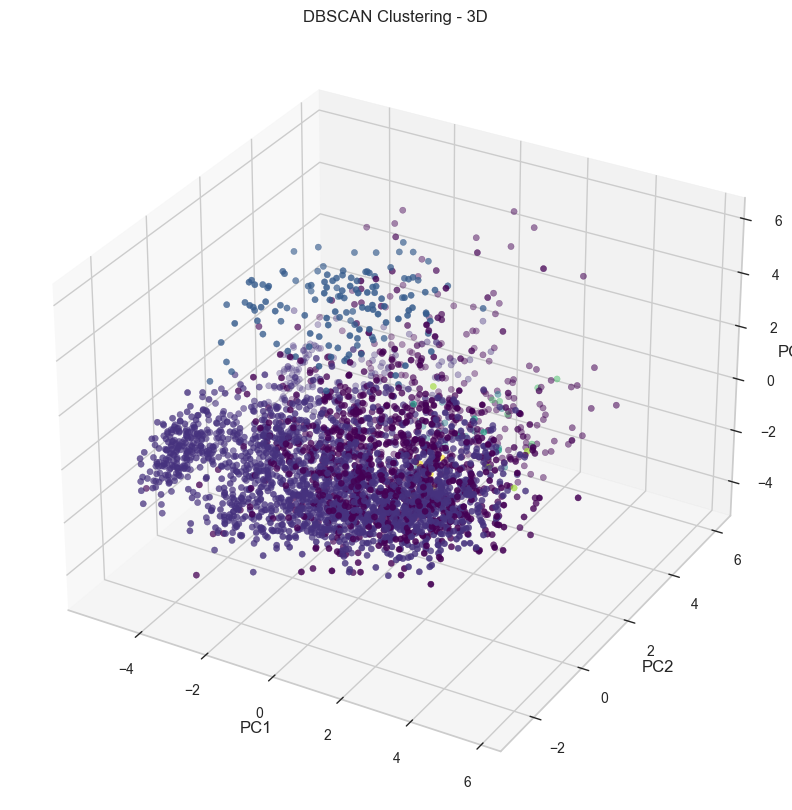

silhouette avg score: -0.13262855972810808
Number of Clusters =  6
Explained variance ratio for each component: [0.13291958 0.07575221]


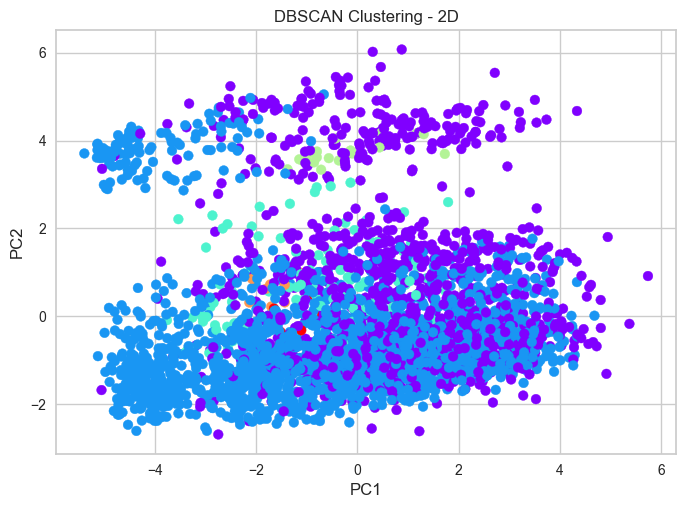

silhouette avg score: -0.2807008981408637
Explained variance ratio for each component: [0.13291958 0.07575221 0.06823918]


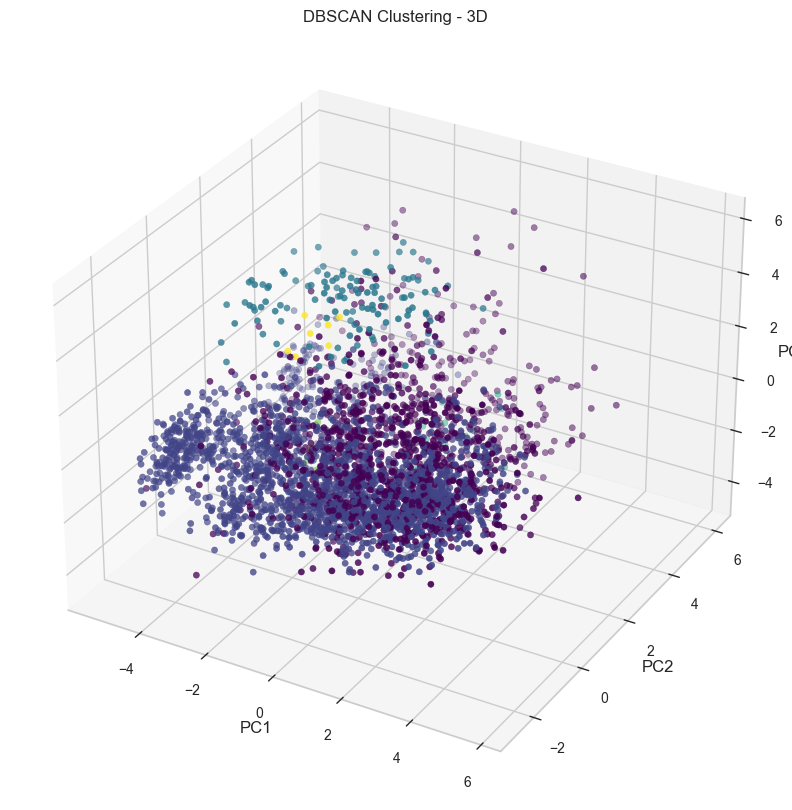

silhouette avg score: -0.17544044996599012
Number of Clusters =  5
Explained variance ratio for each component: [0.13291958 0.07575221]


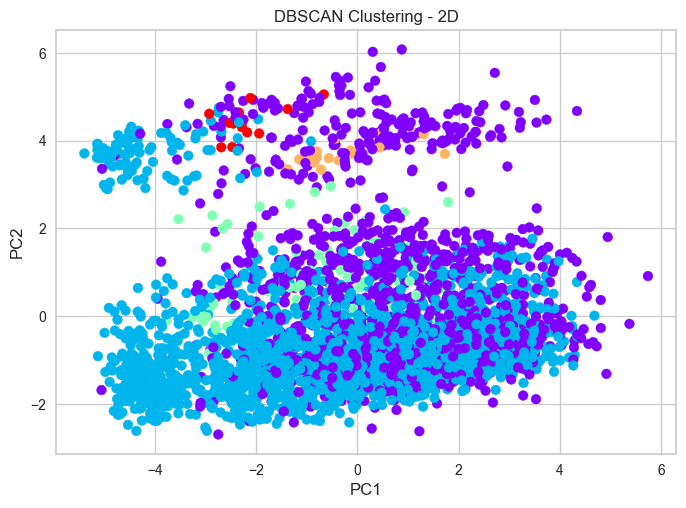

silhouette avg score: -0.12668348910098529
Explained variance ratio for each component: [0.13291958 0.07575221 0.06823918]


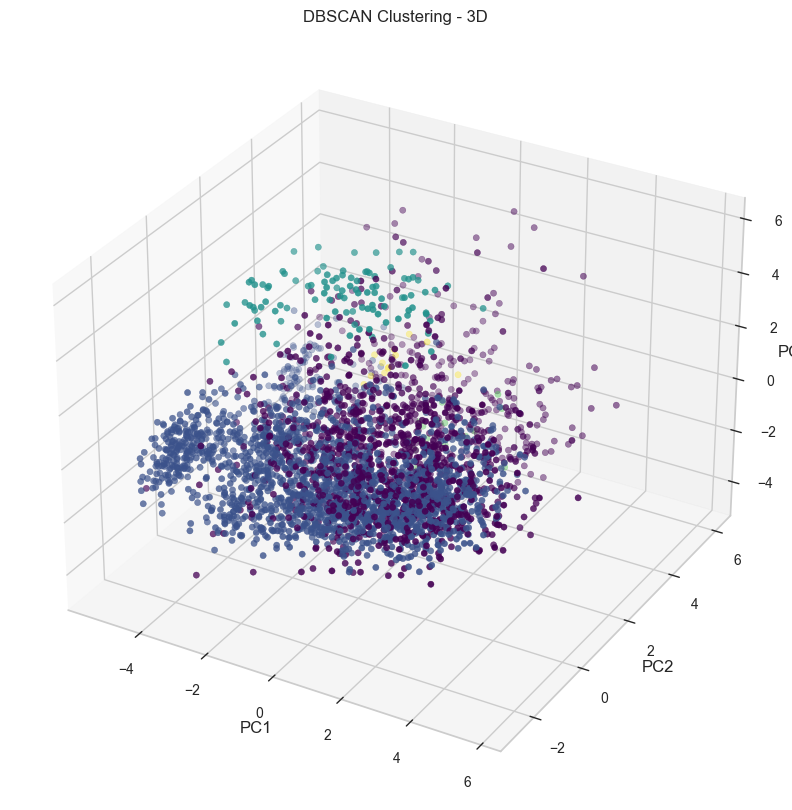

silhouette avg score: 0.015296349757783677
Number of Clusters =  4
Explained variance ratio for each component: [0.13291958 0.07575221]


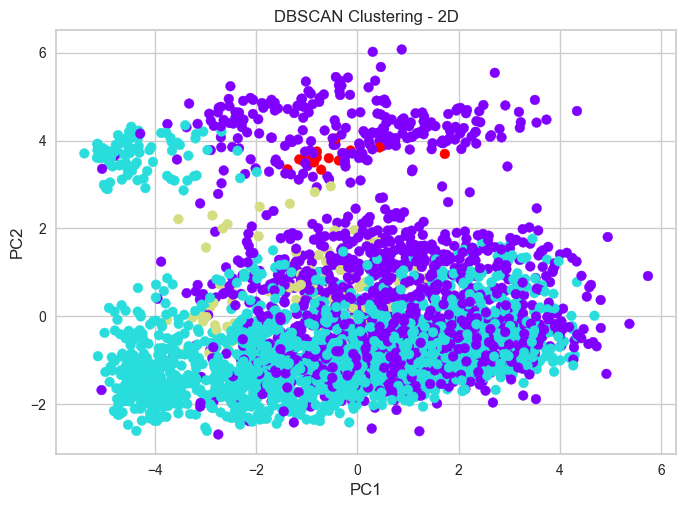

silhouette avg score: -0.1311372505662168
Explained variance ratio for each component: [0.13291958 0.07575221 0.06823918]


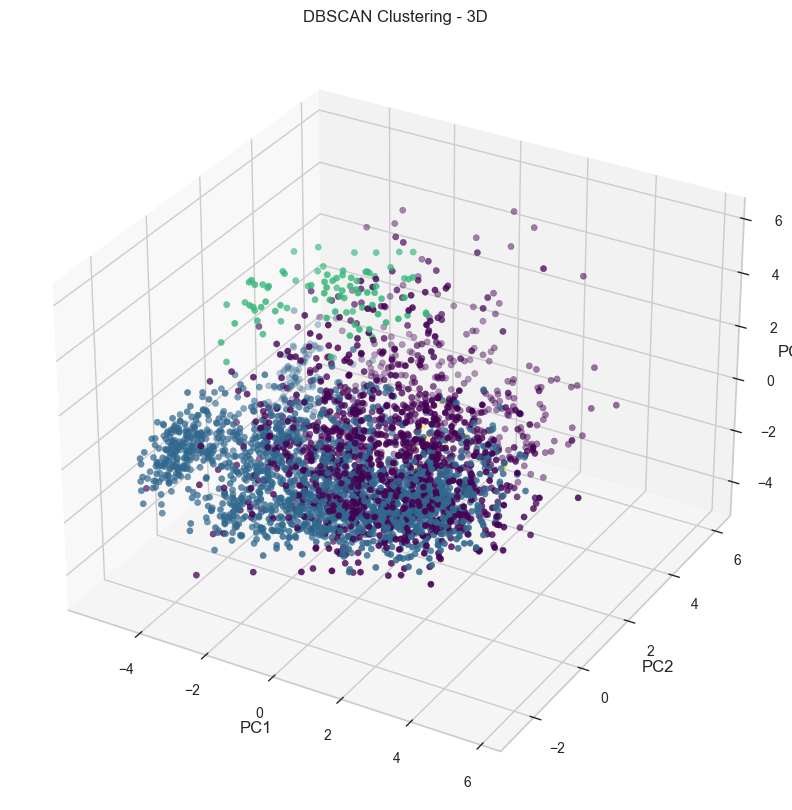

silhouette avg score: 0.020053079498120584
Number of Clusters =  3
Explained variance ratio for each component: [0.13291958 0.07575221]


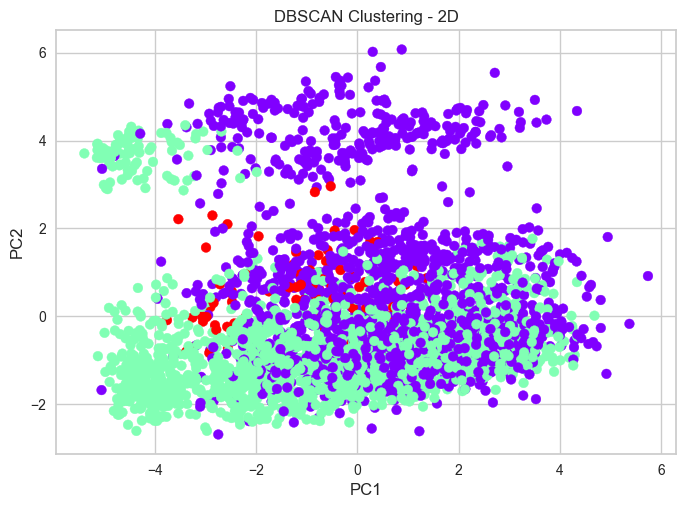

silhouette avg score: -0.09043759682074899
Explained variance ratio for each component: [0.13291958 0.07575221 0.06823918]


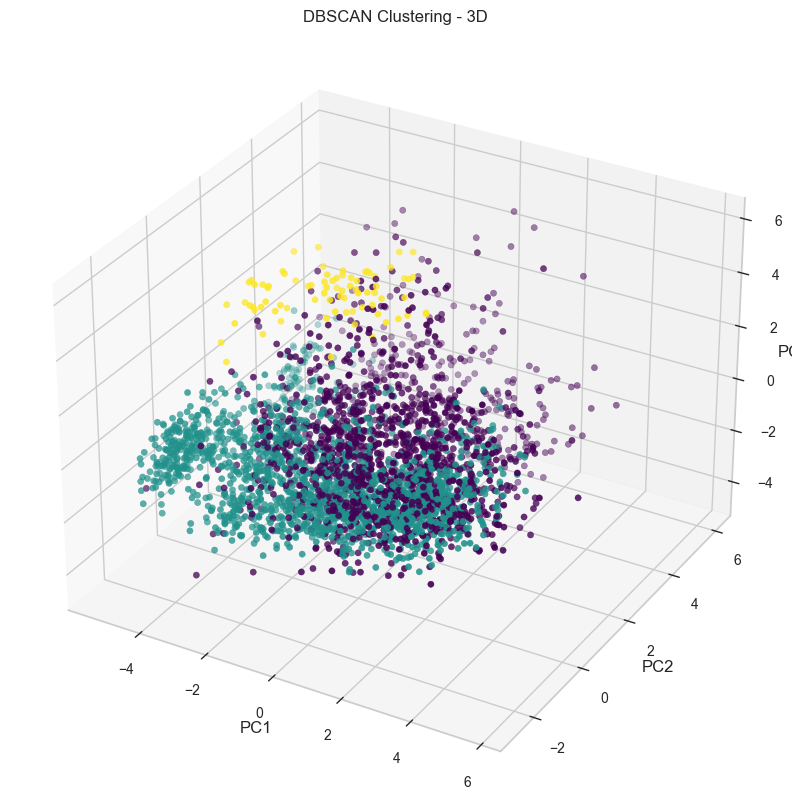

silhouette avg score: 0.06718039039380311


In [15]:
minsamples = [5, 9, 10, 14, 20]
for msample in minsamples:
    # Perform dbscan algo
    clusters = dbscan.perform_dbscan(standard_data, 5 , msample)

    # Print the number of clusters
    print("Number of Clusters = ",len(set(clusters)))

    # Create a PCA On 2 components. 
    X_2reduced = dbscan.create_pca(standard_data, 2)

    # Plotting
    EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

    # Evaluation 
    silhouette_vals = silhouette_samples(X_2reduced, clusters)
    silhouette_avg = silhouette_score(X_2reduced, clusters)
    print("silhouette avg score:",silhouette_avg)

    # Create a PCA On 3 components. 
    X_3reduced = dbscan.create_pca(standard_data, 3)

    # Plotting
    EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

    # Evaluation
    silhouette_vals = silhouette_samples(X_3reduced, clusters)
    silhouette_avg = silhouette_score(X_3reduced, clusters)
    print("silhouette avg score:",silhouette_avg)

It didn't cluster very well 

### DBSCAN on 2 Dimensiones and MinMax-Scaled data. (PCA Before Algo)

In [16]:
# Create a PCA On 2 components. 
X_2reduced = dbscan.create_pca(minmax_data, 2)

Explained variance ratio for each component: [0.12570507 0.06839946]


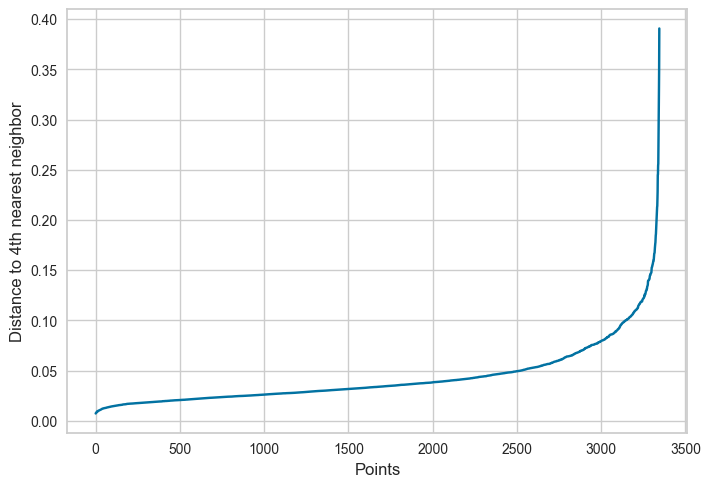

In [17]:
# Use K distance graph to determine the eps value. 
dbscan.get_kdistances(X_2reduced,4)

Based on the graph, I will choose eps = 0.1 <br>
I will try these values for MinSamples = [values from 5 to 20]. 

In [18]:
for i in range(5,20):
    # Perform dbscan algo
    clusters = dbscan.perform_dbscan(X_2reduced, 0.1 , i)

    # Print the number of clusters
    print("Number of Clusters for", i," = ",len(set(clusters)))

Number of Clusters for 5  =  17
Number of Clusters for 6  =  13
Number of Clusters for 7  =  10
Number of Clusters for 8  =  9
Number of Clusters for 9  =  7
Number of Clusters for 10  =  6
Number of Clusters for 11  =  6
Number of Clusters for 12  =  5
Number of Clusters for 13  =  6
Number of Clusters for 14  =  8
Number of Clusters for 15  =  7
Number of Clusters for 16  =  8
Number of Clusters for 17  =  7
Number of Clusters for 18  =  6
Number of Clusters for 19  =  5


as long as we have different values for minsamples, i'll try those: [6, 9, 10, 15, 19]

In [ ]:
minsamples = [6, 9, 10, 15, 19]
for msample in minsamples: 
    # Perform dbscan algo
    clusters = dbscan.perform_dbscan(X_2reduced, 0.1 , msample)

    # Print the number of clusters
    print("Number of Clusters for", msample," = ",len(set(clusters)))
    
    EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters 6  =  13


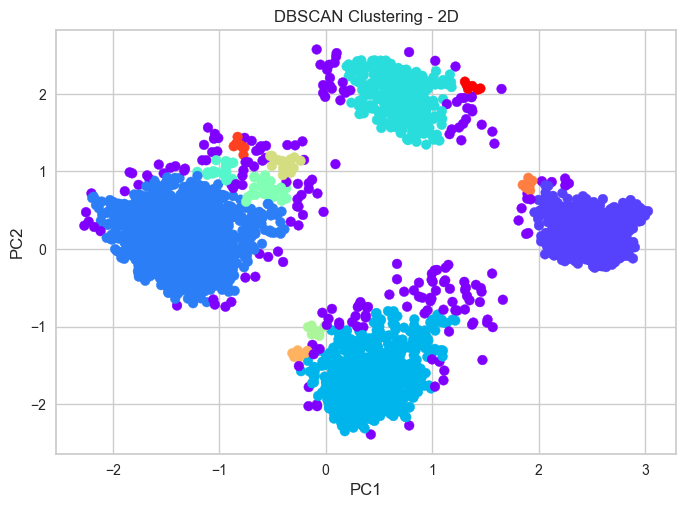

silhouette avg score: 0.31457307148715924
Number of Clusters 9  =  7


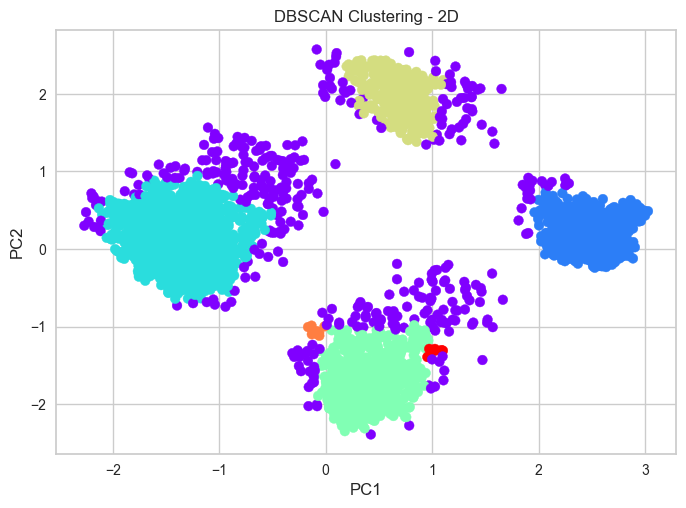

silhouette avg score: 0.4845042515341936
Number of Clusters 10  =  6


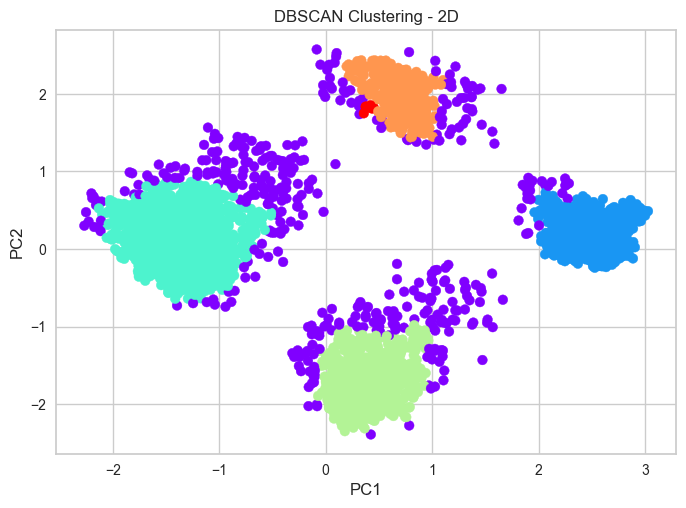

silhouette avg score: 0.541847327442351
Number of Clusters 15  =  7


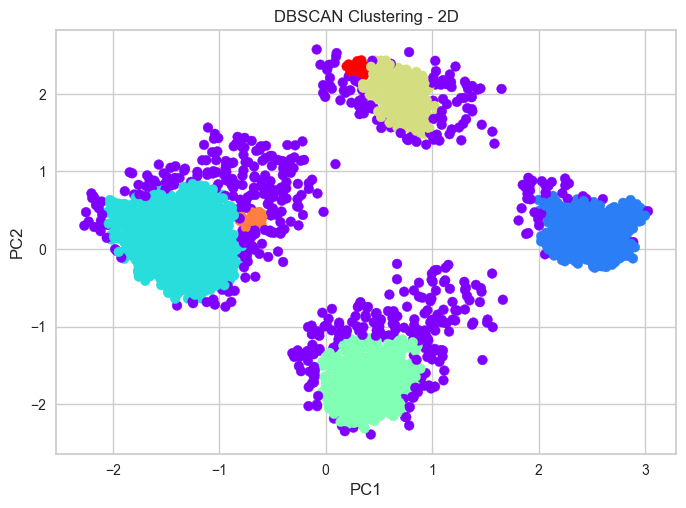

silhouette avg score: 0.3366849375002676
Number of Clusters 19  =  5


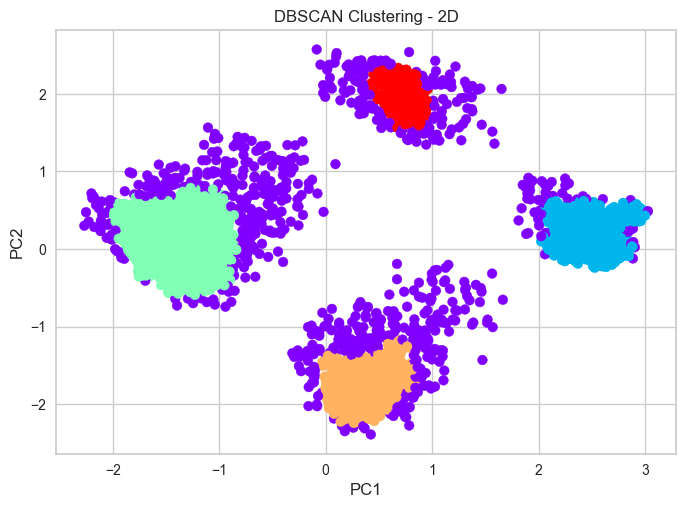

silhouette avg score: 0.4738027379703025


In [20]:
minsamples = [6, 9, 10, 15, 19]
for msample in minsamples:
    # Perform dbscan algo
    clusters = dbscan.perform_dbscan(X_2reduced, 0.1 , msample)

    # Print the number of clusters
    print("Number of Clusters",msample," = ",len(set(clusters)))

    # Plotting
    EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

    # Evaluation 
    silhouette_vals = silhouette_samples(X_2reduced, clusters)
    silhouette_avg = silhouette_score(X_2reduced, clusters)
    print("silhouette avg score:",silhouette_avg)

It performed well on minsamples = 10, with avg score = 0.54

### DBSCAN on 2 Dimensiones and Standard-Scaled data.

In [23]:
# Create a PCA On 2 components. 
X_2reduced = dbscan.create_pca(standard_data, 2)

Explained variance ratio for each component: [0.13291958 0.07575221]


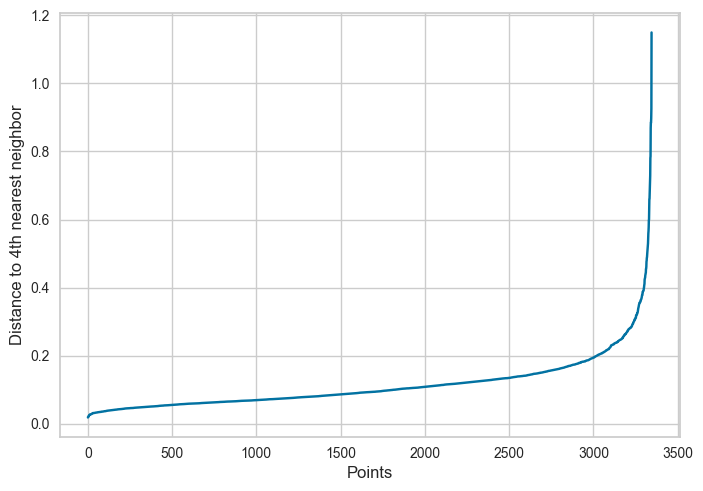

In [24]:
# Use K distance graph to determine the eps value. 
dbscan.get_kdistances(X_2reduced,4)

Based on the graph, I will choose eps = 0.25 <br>
I will try these values for MinSamples = [values from 5 to 20]. 

In [25]:
for i in range(5,20):
    # Perform dbscan algo
    clusters = dbscan.perform_dbscan(X_2reduced, 0.25 , i)

    # Print the number of clusters
    print("Number of Clusters for minsamples =", i," equals ",len(set(clusters)))

Number of Clusters for 5  =  79
Number of Clusters for 6  =  59
Number of Clusters for 7  =  45
Number of Clusters for 8  =  39
Number of Clusters for 9  =  30
Number of Clusters for 10  =  23
Number of Clusters for 11  =  22
Number of Clusters for 12  =  22
Number of Clusters for 13  =  16
Number of Clusters for 14  =  12
Number of Clusters for 15  =  11
Number of Clusters for 16  =  7
Number of Clusters for 17  =  2
Number of Clusters for 18  =  1
Number of Clusters for 19  =  1


as long as we have different values for minsamples, i'll try those: [10, 13, 15, 16, 17]

Number of Clusters for 10  =  12


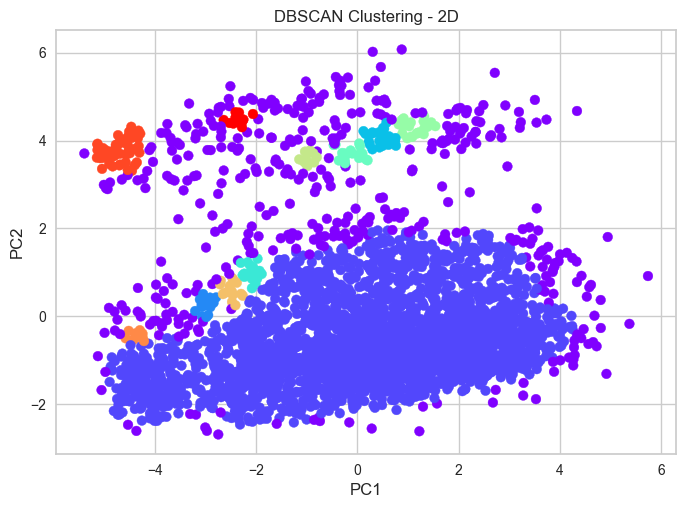

silhouette avg score: 0.006407949149933518
Number of Clusters for 13  =  9


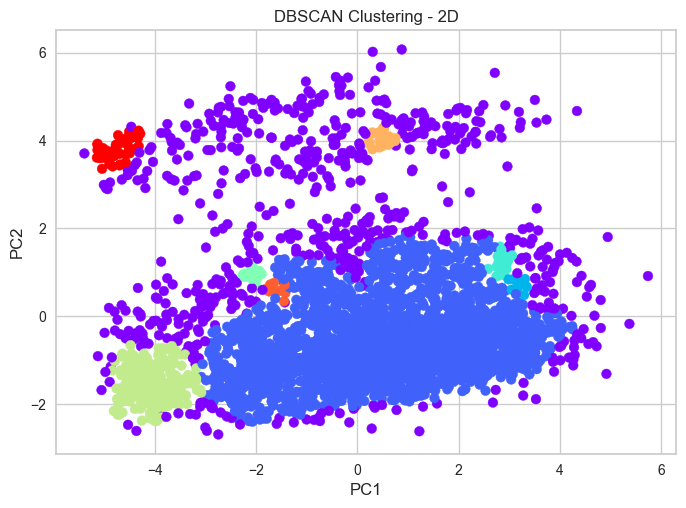

silhouette avg score: -0.17191300030922255
Number of Clusters for 15  =  9


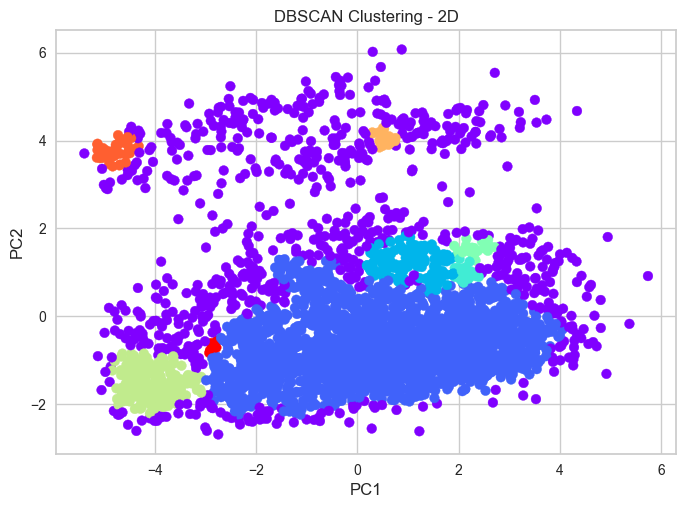

silhouette avg score: -0.1795393297767217
Number of Clusters for 16  =  9


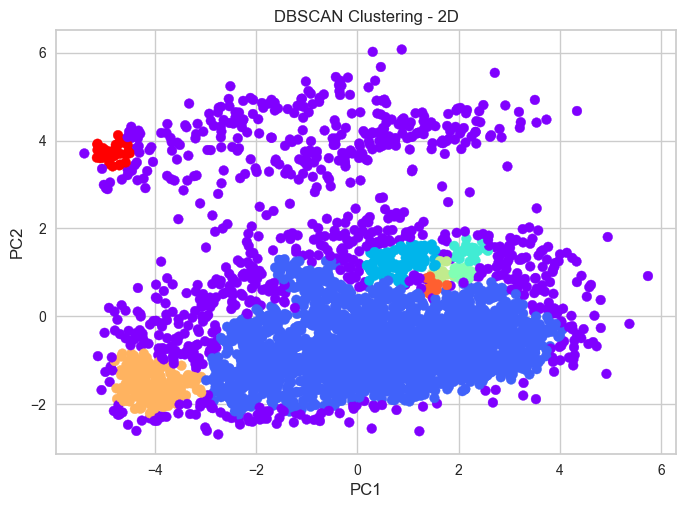

silhouette avg score: -0.13651695680805248
Number of Clusters for 17  =  7


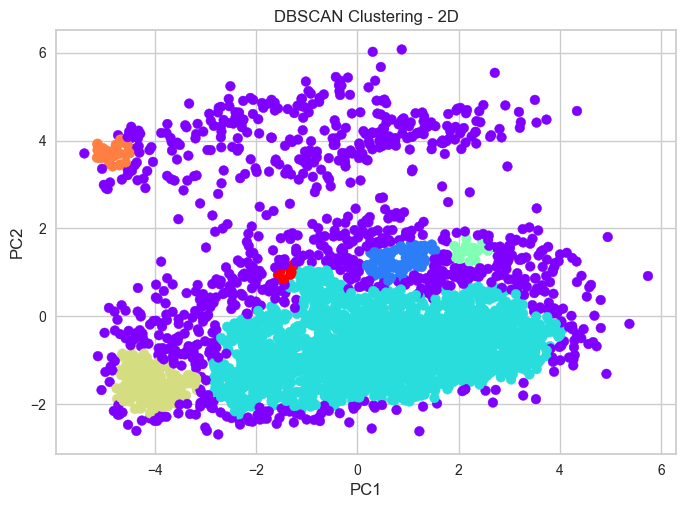

silhouette avg score: -0.12298339798499557


In [27]:
minsamples = [10, 13, 15, 16, 17]
for msample in minsamples: 
    # Perform dbscan algo
    clusters = dbscan.perform_dbscan(X_2reduced, 0.25 , msample)

    # Print the number of clusters
    print("Number of Clusters for", msample," = ",len(set(clusters)))
    
    EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

    # Evaluation 
    silhouette_vals = silhouette_samples(X_2reduced, clusters)
    silhouette_avg = silhouette_score(X_2reduced, clusters)
    print("silhouette avg score:",silhouette_avg)

It didn't cluster very well, almost all values are negative. pca on minmax was much better. 

#### DBSCAN on 3 Dimensiones and MinMax-Scaled Data.

In [28]:
# Create a PCA on 3 components
X_3reduced = dbscan.create_pca(minmax_data, 3)

Explained variance ratio for each component: [0.12570507 0.06839946 0.0525458 ]


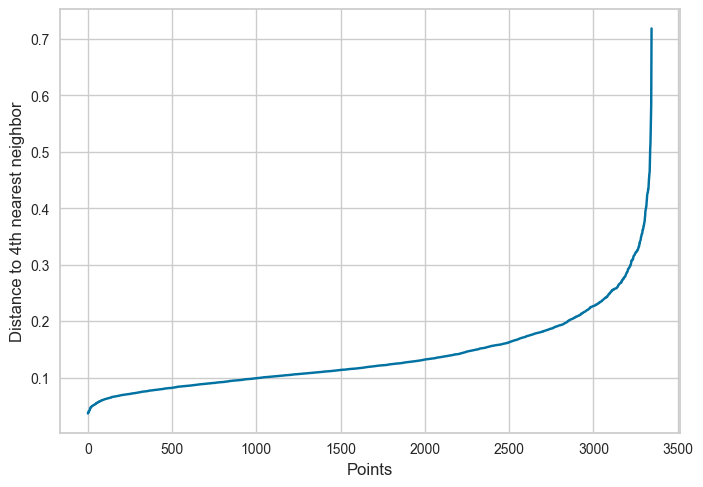

In [29]:
# Use K distance graph to determine the eps value. 
dbscan.get_kdistances(X_3reduced,4)

Based on the graph, I will choose eps = 0.25 <br>
I will try these values for min_samples = [values from 5 to 20].

In [31]:
for i in range(5,20):
    # Perform dbscan algo
    clusters = dbscan.perform_dbscan(X_3reduced, 0.25 , i)

    # Print the number of clusters
    print("Number of Clusters for", i," = ",len(set(clusters)))

Number of Clusters for 5  =  12
Number of Clusters for 6  =  10
Number of Clusters for 7  =  9
Number of Clusters for 8  =  11
Number of Clusters for 9  =  10
Number of Clusters for 10  =  9
Number of Clusters for 11  =  7
Number of Clusters for 12  =  6
Number of Clusters for 13  =  6
Number of Clusters for 14  =  6
Number of Clusters for 15  =  6
Number of Clusters for 16  =  5
Number of Clusters for 17  =  5
Number of Clusters for 18  =  5
Number of Clusters for 19  =  5


as long as we have different values for minsamples, i'll try those: [5, 7, 11, 15, 19]

Number of Clusters 5  =  12


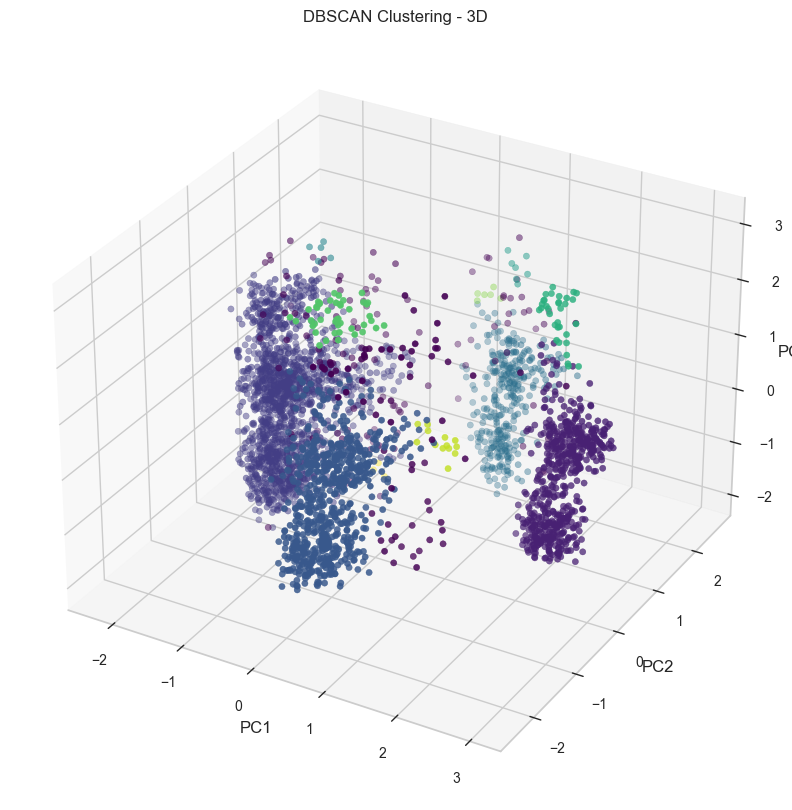

silhouette avg score: 0.23101735810394589
Number of Clusters 7  =  9


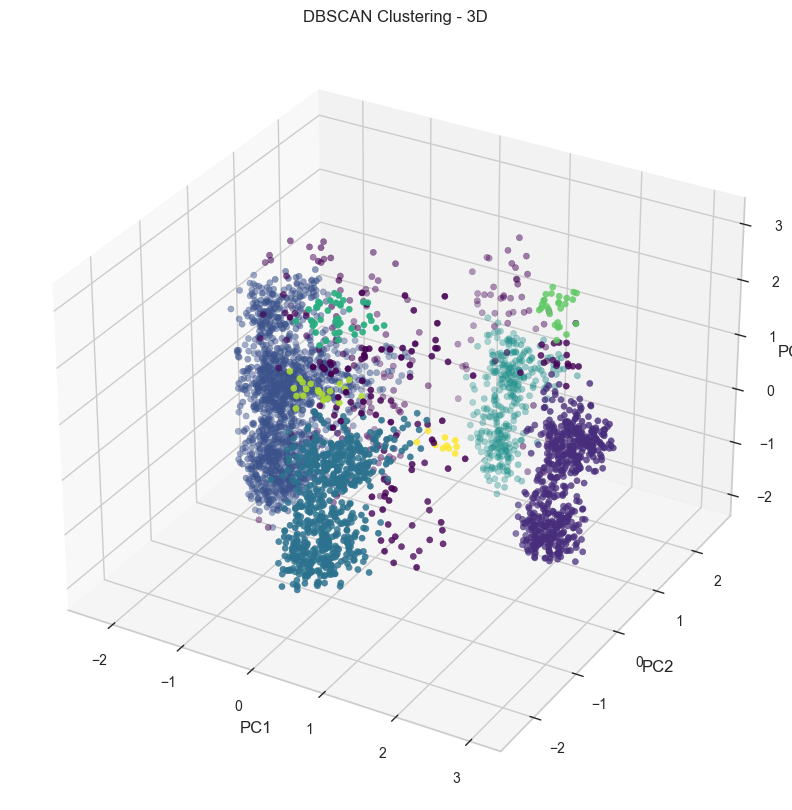

silhouette avg score: 0.40369637164195016
Number of Clusters 11  =  7


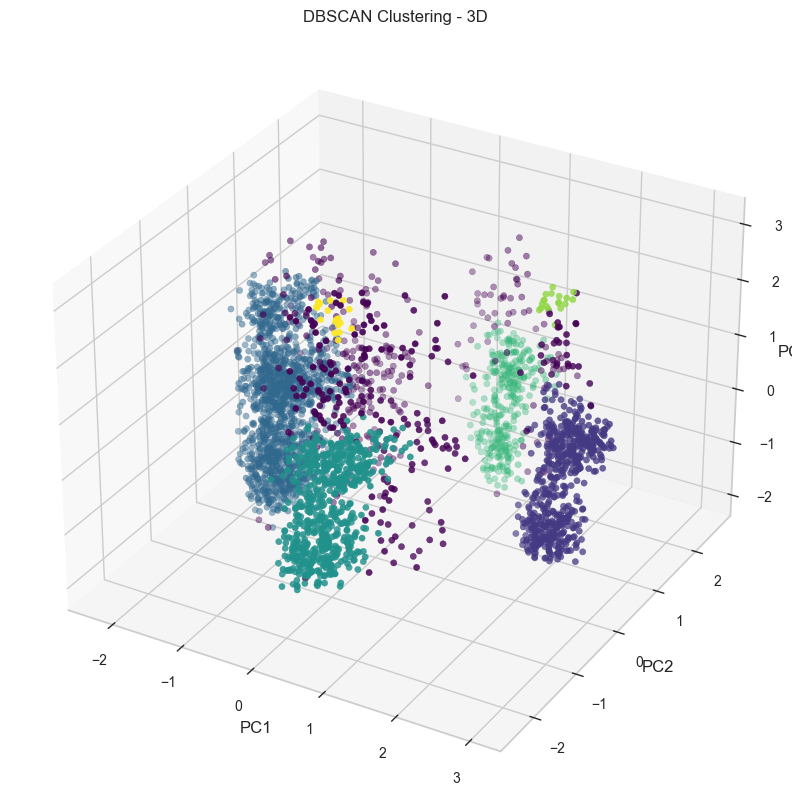

silhouette avg score: 0.44504552690252885
Number of Clusters 15  =  6


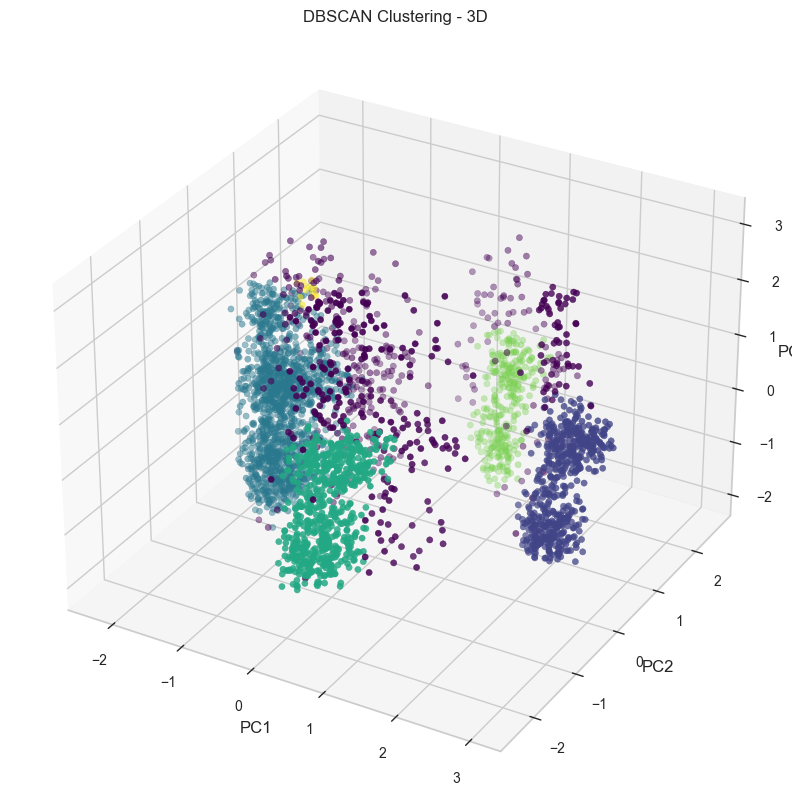

silhouette avg score: 0.34314791887541923
Number of Clusters 19  =  5


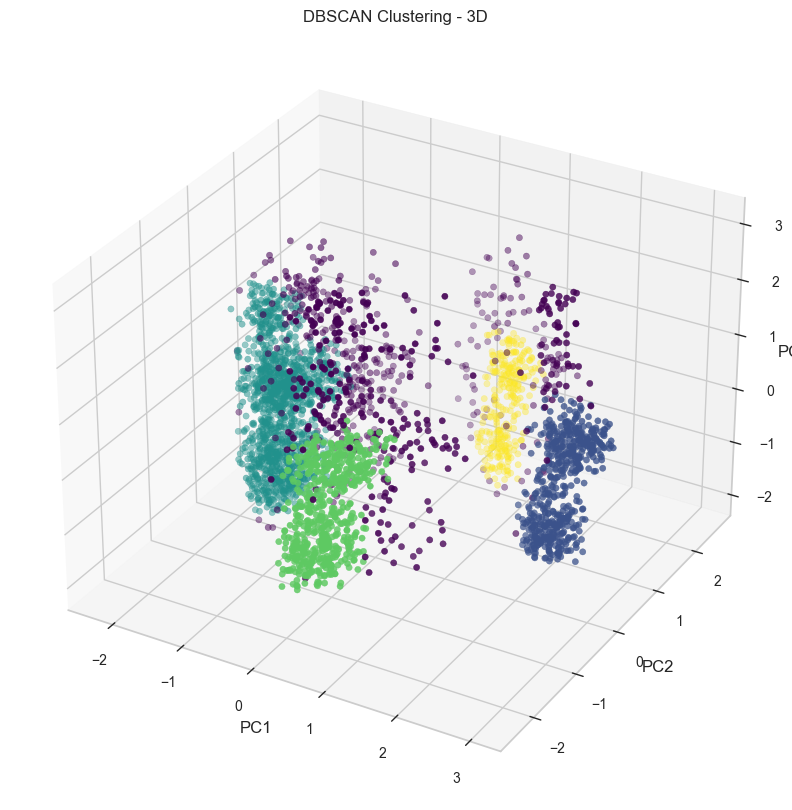

silhouette avg score: 0.43053185085472856


In [32]:
minsamples = [5, 7, 11, 15, 19]
for msample in minsamples:
    # Perform dbscan algo
    clusters = dbscan.perform_dbscan(X_3reduced, 0.25 , msample)

    # Print the number of clusters
    print("Number of Clusters",msample," = ",len(set(clusters)))

    # Plotting
    EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

    # Evaluation 
    silhouette_vals = silhouette_samples(X_3reduced, clusters)
    silhouette_avg = silhouette_score(X_3reduced, clusters)
    print("silhouette avg score:",silhouette_avg)

Minsamples = 11 performed well with score = 0.44 

#### DBSCAN on 3 Dimensiones and Standard-Scaled data.

In [33]:
# Create a PCA on 3 components
X_3reduced = dbscan.create_pca(standard_data, 3)

Explained variance ratio for each component: [0.13291958 0.07575221 0.06823918]


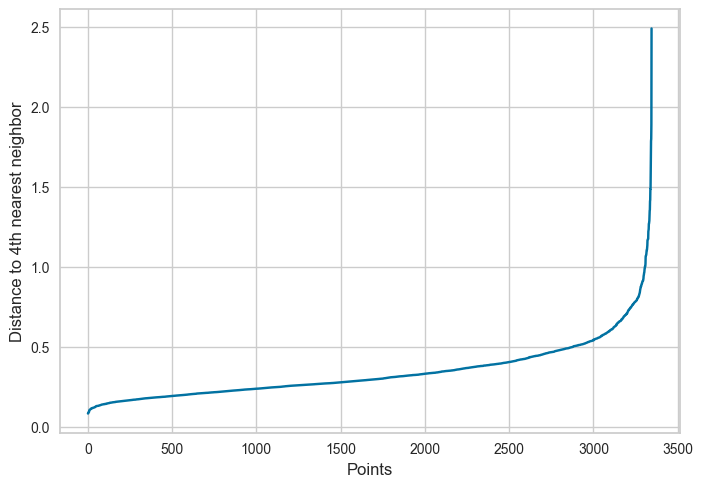

In [34]:
# Use K distance graph to determine the eps value. 
dbscan.get_kdistances(X_3reduced,4)

Based on the graph, I will choose eps = 0.8 <br>
I will try these values for min_samples = [values from 5 to 20].

In [35]:
for i in range(5,20):
    # Perform dbscan algo
    clusters = dbscan.perform_dbscan(X_3reduced, 0.8 , i)

    # Print the number of clusters
    print("Number of Clusters for", i," = ",len(set(clusters)))

Number of Clusters for 5  =  4
Number of Clusters for 6  =  4
Number of Clusters for 7  =  4
Number of Clusters for 8  =  3
Number of Clusters for 9  =  5
Number of Clusters for 10  =  5
Number of Clusters for 11  =  5
Number of Clusters for 12  =  5
Number of Clusters for 13  =  5
Number of Clusters for 14  =  5
Number of Clusters for 15  =  6
Number of Clusters for 16  =  6
Number of Clusters for 17  =  6
Number of Clusters for 18  =  6
Number of Clusters for 19  =  6


as long as we have different values for minsamples, i'll try those: [5, 8, 9, 15]

Number of Clusters 5  =  4


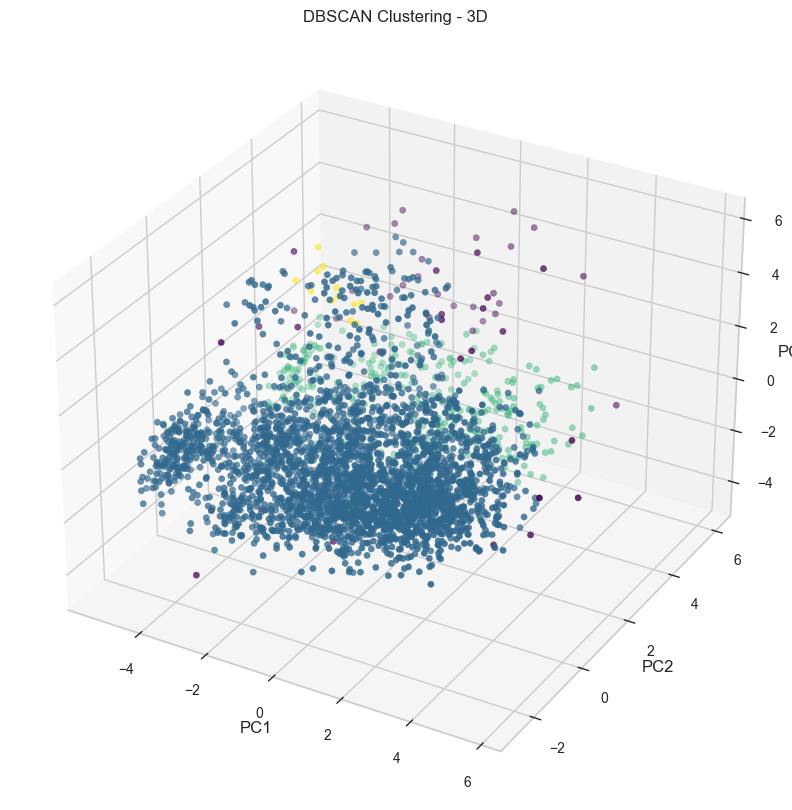

silhouette avg score: 0.3107317913786489
Number of Clusters 8  =  3


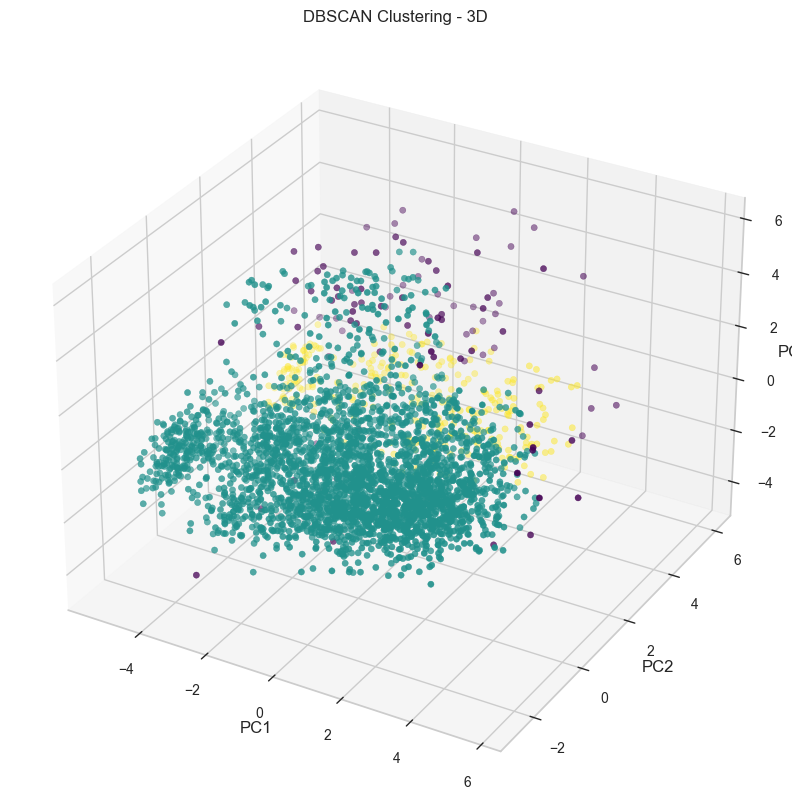

silhouette avg score: 0.3723369434049954
Number of Clusters 9  =  5


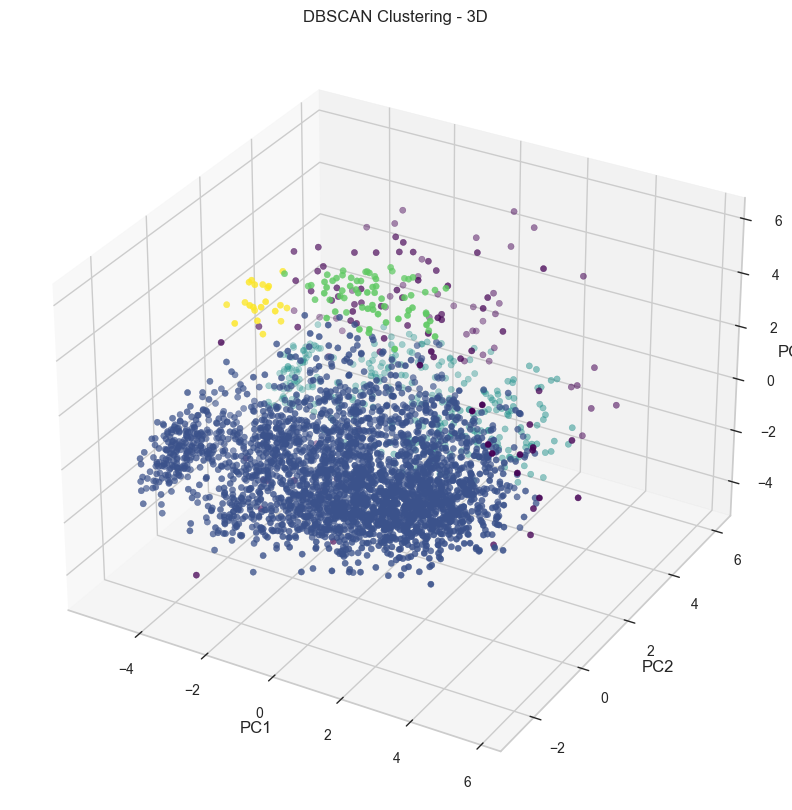

silhouette avg score: 0.33606338620590204
Number of Clusters 15  =  6


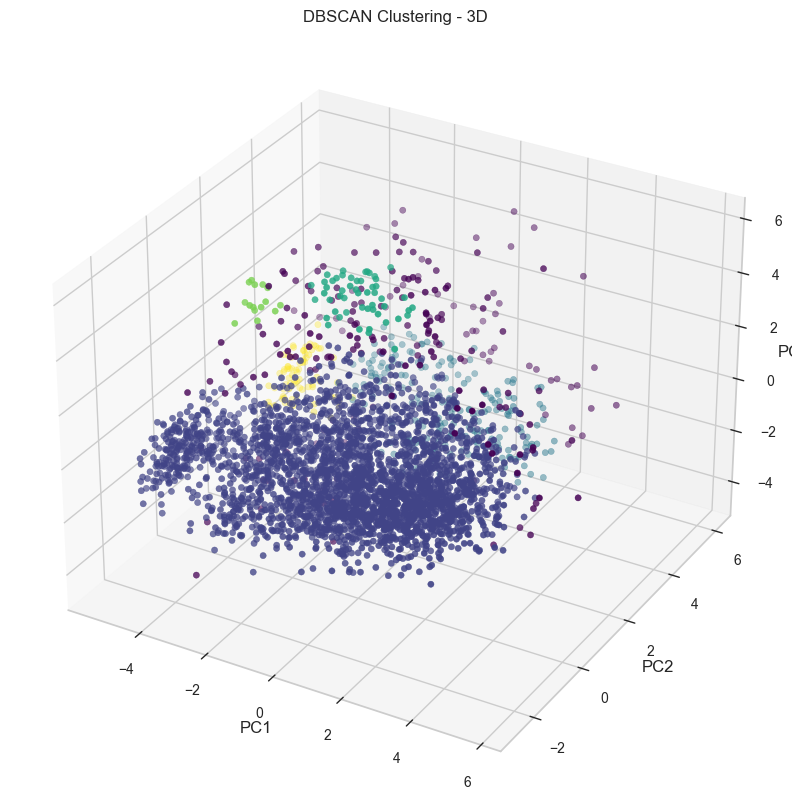

silhouette avg score: 0.30304938328789693


In [36]:
minsamples = [5, 8, 9, 15]
for msample in minsamples:
    # Perform dbscan algo
    clusters = dbscan.perform_dbscan(X_3reduced, 0.8 , msample)

    # Print the number of clusters
    print("Number of Clusters",msample," = ",len(set(clusters)))

    # Plotting
    EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

    # Evaluation 
    silhouette_vals = silhouette_samples(X_3reduced, clusters)
    silhouette_avg = silhouette_score(X_3reduced, clusters)
    print("silhouette avg score:",silhouette_avg)

It performed better than the standard scaled - 2d, but still the minmax is outperforming. 

## Conclusions: 
- Minmax scaled data is giving better results than the standard scaled data. 
- Performing Dimensionality reduction (PCA) before performing the algorithm gives better results than pca being after algo. 
- 2D minmax scaled data with eps = 0.1 ,minsamples = 10 gives the best results with average sillehouttee score = 0.54